In [68]:
%matplotlib inline 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv
from tqdm import tqdm
data_root = 'D:/PPic/GraphisDataSet'

In [126]:
label_df = pd.read_csv('GraphisLabel.csv', encoding='gbk', names=['link', 'file_location', 'label'])

y = pd.get_dummies(label_df.label)
label_df.head()

,link,file_location,label
0,https://www.jav.ink/wp-content/uploads/2020/02...,D:/PPic/GraphisDataSet/Uta_Yumemite_夢見照うた_gra_...,-
1,https://www.jav.ink/wp-content/uploads/2020/02...,D:/PPic/GraphisDataSet/Uta_Yumemite_夢見照うた_gra_...,-
2,https://www.jav.ink/wp-content/uploads/2020/02...,D:/PPic/GraphisDataSet/Uta_Yumemite_夢見照うた_gra_...,-
3,https://www.jav.ink/wp-content/uploads/2020/02...,D:/PPic/GraphisDataSet/Uta_Yumemite_夢見照うた_gra_...,-
4,https://www.jav.ink/wp-content/uploads/2020/02...,D:/PPic/GraphisDataSet/Uta_Yumemite_夢見照うた_gra_...,-


In [125]:
sum(label_df.label == '+')

157

In [73]:
def load_image(image_file, resize_shape):
    f = open(image_file, "rb")
    chunk = f.read()
    chunk_arr = np.frombuffer(chunk, dtype=np.uint8)
    image = cv.imdecode(chunk_arr, cv.IMREAD_UNCHANGED)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (resize_shape[1], resize_shape[0]))
    return image

2612491913936
2612491913056
(200, 300, 3)


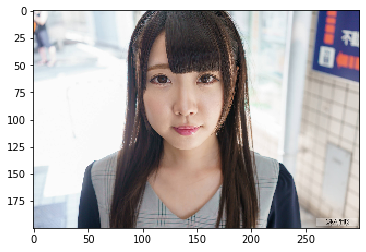

In [147]:
# check single image
image_file = label_df.iloc[0]['file_location']
image = load_image(image_file, resize_shape=(200, 300))
rows = image.shape[0]
cols = image.shape[1]
center_x = cols // 2
center_y = rows // 2
rotate_degree = 0
# image = np.fliplr(image)
print(id(image))
rotation_matrix = cv.getRotationMatrix2D((center_x, center_y), rotate_degree, 1)  # rotation center
image = cv.warpAffine(image, rotation_matrix, (cols, rows))
print(id(image))
print(image.shape)
plt.imshow(image, interpolation='nearest')
# cv.imwrite('./debug/debug.jpg', cv.cvtColor(image, cv.COLOR_RGB2BGR))

In [76]:
image_row = 200
image_col = 300
image_data = np.zeros((len(label_df), image_row, image_col, 3))

for index, row in tqdm(label_df.iterrows(), total=len(label_df)):
    current_image = load_image(row.file_location, (image_row, image_col))
    assert current_image.shape == (image_row, image_col, 3)
    image_data[index] = current_image
    

100%|████████████████████████████████████████████████████████| 2381/2381 [00:47<00:00, 50.02it/s]


## CNN Model

In [119]:
import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, concatenate, Dropout
# from tensorflow.keras.models import Sequential

net = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96,kernel_size=11,strides=4,activation='relu', input_shape=(200,300,3)),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='sigmoid')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

net.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

net

In [114]:
image_data.shape
y.shape

(2381, 2)

In [121]:
net.fit([image_data], y, batch_size=32, epochs=100)

Train on 2381 samples
Epoch 1/100
2381/2381 [==============================] - 2s 1ms/sample - loss: 1.0628 - accuracy: 0.93410s - loss: 1.0429 - accuracy: 0.
Epoch 2/100
2381/2381 [==============================] - 2s 973us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 3/100
2381/2381 [==============================] - 2s 963us/sample - loss: 1.0628 - accuracy: 0.9341 - loss: 0.9738 - ac - ETA: 1s - loss: 0.9379 - accura - ETA: 
Epoch 4/100
2381/2381 [==============================] - 2s 957us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 5/100
2381/2381 [==============================] - 2s 958us/sample - loss: 1.0628 - accuracy: 0.9341 - loss: 1.0074 - accuracy: 0.93 - ETA: 1s
Epoch 6/100
2381/2381 [==============================] - 2s 962us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 7/100
2381/2381 [==============================] - 2s 948us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 8/100
2381/2381 [==============================] - 2s 960us/sample - loss: 1.0628 - accur

2381/2381 [==============================] - 2s 958us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 72/100
2381/2381 [==============================] - 2s 959us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 73/100
2381/2381 [==============================] - 2s 959us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 74/100
2381/2381 [==============================] - 2s 963us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 75/100
2381/2381 [==============================] - 2s 950us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 76/100
2381/2381 [==============================] - 2s 958us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 77/100
2381/2381 [==============================] - 2s 955us/sample - loss: 1.0628 - accuracy: 0.9341
Epoch 78/100
2381/2381 [==============================] - 2s 955us/sample - loss: 1.0628 - accuracy: 0.9341 - loss: 1.135
Epoch 79/100
2381/2381 [==============================] - 2s 955us/sample - loss: 1.0628 - accuracy: 0.9341 - loss: 1.1065 - ac
Epoch 8